<a href="https://colab.research.google.com/github/Dallan-David/Machine-Learning_1/blob/main/Proyecto_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊🧠📈🏦💰💸💹

# **Explicación del código:**


### **Librerías utilizadas en la codificación** 📚
1.   numpy / pandas: manipulación de datos
1.   matplotlib / seaborn: visualización
2.   sickit - learn: machine learning (modelo de procesamiento y clasificación binaria)
2.   Dataset: importado, archivo de excel
______________________________________________________
### **Características** 💳
*   Modelo utilizado para la aprobación de un crédito, basado en diversas variables
*   8 variables númericas
*   Variable objetivo: crédito_aprobado (0: denegado, 1: aprovado)
_______________________________________________________
### **Visualizaciónes incluidas** 🗺️

+   Matriz de confusión
____________________________________________

### **Modelo de machine learning** ֎🧠

*   **Regresión Logística:** algoritmo potente para clasificación en escenarios binarios
*   **Procesamietno** escalado estandar de características
*   **Evaluación:** reporte de clasificación, precisión, matriz de clasificación
 __________________________________________

### **¿Cómo ejecutarlo?** 👨🏻‍💻🦾🚀
1.   Copia este código en un jupyter notebook o script.py
2.   Asegúrate de tener instaladas las librerías:
     ```bash
     pip install numpy
     pip install pandas
     pip install matplotlib
     pip install seaborn
     pip install sickit-learn
     ```
3.   Copia y pega este código en tu terminal o ejecuta celda por celda en tu jupyter / script
____________________________________
### **Posibles mejoras** 🆙💎
- Más data
- Análisis más detallado de características
- Posible enfoque a una evolución del modelo hacia "predicciones futuras"


**Este código proporciona un resutado binario enfocado en el campo bancario, con el objetivo de sugerir o no un crédito al cliente** 💳💲

--preparación de datos--
Vista previa de los datos originales:
   Ingresos_mensuales Nivel_educativo  Deuda_actual  Historial_crediticio  \
0             1000000          Basico      30000000                     0   
1             1100000          Basico      29900000                     0   
2             1200000          Basico      29800000                     0   
3             1300000          Basico      29700000                     0   
4             1400000          Basico      29600000                     0   

   Años_experiencia_Préstamos  Edad  Aprobado_credito  Valor_préstamo  
0                           0    19                 0        30000000  
1                           0    20                 0        29900000  
2                           0    21                 0        29800000  
3                           0    22                 0        29700000  
4                           0    23                 0        29600000  

Datos Codificados con Scikit-learn:
   Ni

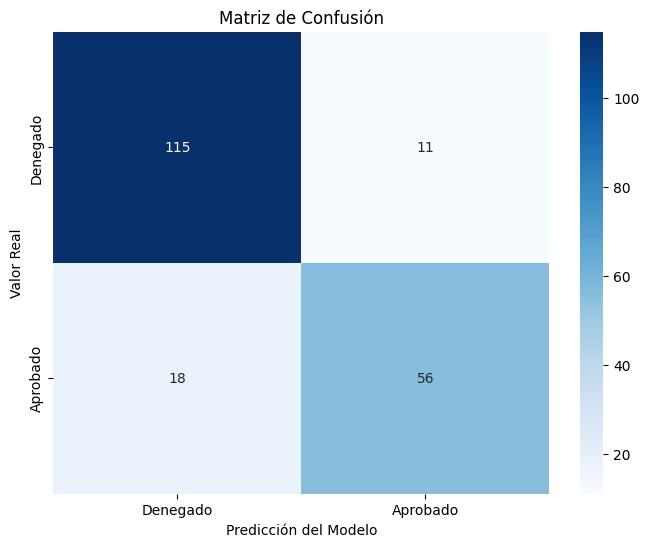


--- Predicción para un nuevo cliente ---
Datos del nuevo cliente:
 Edad  Ingresos_mensuales  Historial_crediticio Nivel_educativo  Deuda_actual  Años_experiencia_Préstamos  Valor_préstamo
   45               85000                     1         Sperior       1000000                           5        20000000

Datos del cliente listos para el modelo:
 Ingresos_mensuales  Deuda_actual  Historial_crediticio  Años_experiencia_Préstamos  Edad  Valor_préstamo  Nivel_educativo_Basico  Nivel_educativo_Medio  Nivel_educativo_Superior
              85000       1000000                     1                           5    45        20000000                     0.0                    0.0                       0.0

--- RESULTADO DE LA PREDICCIÓN ---
Resultado: Crédito APROBADO ✅
Probabilidad de ser denegado (Clase 0): 2.44%
Probabilidad de ser aprobado (Clase 1): 97.56%


In [ ]:
# Crear un modelo que prediga si una persona es apta para recibir un microcrédito (sí/no),
# basándose en características como ingresos, deudas, antigüedad laboral, nivel educativo, etc.

# ingresos_mensuales (numérico)

# deuda_actual (numérico)

# historial_crediticio (0 = malo, 1 = bueno)

# nivel_educativo (básico, medio, superior)

# años_experiencia (numérico)

# edad (numérico)

# aprobado_credito (0 = no, 1 = sí)

# Valor_préstamo = 20000000
# _____________________________________________________

# # ---PASO 1. PREPARACIÓN DE LOS DATOS---
# -Importando librerías:

# Manipulación de datos
import numpy as np
import pandas as pd
# Vizsualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder


# -Datos:
print('--preparación de datos--')

df = pd.read_csv('Datos_Muy_Datados.csv', sep=';')
# Limpiando los nombres de las columnas
df.columns = df.columns.str.strip()
print("Vista previa de los datos originales:")
print(df.head())

# Codificación One-Hot para 'Nivel_educativo'
# handle_unknown='ignore' evita errores si en el futuro aparecen categorías no vistas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Ajustar y transformar los datos
encoded_data = encoder.fit_transform(df[['Nivel_educativo']])
# Convertir el resultado en un nuevo DataFrame para mejor visualización
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Nivel_educativo']))
print("\nDatos Codificados con Scikit-learn:")
print(encoded_df.head())

# Cambiamos la columna Niel_educativo, ya que no se aceptan los textos
df_sin_texto = df.drop('Nivel_educativo', axis=1)
# Y la unimos con la nueva categoría Nivel_educativo, usamos .join() que es más seguro para esta operación
df_processed = df_sin_texto.join(encoded_df)

print("\n--- DataFrame final listo para el modelo ---")
print(df_processed.head())




# # ---PASO 2. ELECCIÓN DEL ALGORITMO Y PREPARACIÓN DE VARIABLES---

# --1. Preparación de variables:

X = df_processed.drop('Aprobado_credito', axis=1) # Todas las columnas MENOS la que quieres predecir
y = df_processed['Aprobado_credito'] # SOLO la columna que quieres predecir

# Asegúrate de que X solo contenga números y no haya valores nulos.
print("\nInformación de nuestras variables X:")
print(X.info())

# --2. División de los datos y entrenamiento de prueba (80% para entrenar, 20% para probar)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# # ---PASO 3: CREAR Y ENTRENAR EL MODELO---
modelo = LogisticRegression(max_iter=1000) # Aumentar max_iter puede ayudar si el modelo no converge
modelo.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
predicciones = modelo.predict(X_test)

#  Evaluar la exactitud del modelo
if len(y_test) > 0:
    print(f"\nLa exactitud (accuracy) del modelo es: {accuracy_score(y_test, predicciones):.4f}")
else:
    print("\nNo hay datos de prueba para evaluar la exactitud.")

# --Matriz de confusión:
matriz = confusion_matrix(y_test, predicciones)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Denegado', 'Aprobado'],
            yticklabels=['Denegado', 'Aprobado'])

plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


# --- PASO 4: PROBAR EL MODELO CON UN NUEVO EJEMPLO ---

print("\n--- Predicción para un nuevo cliente ---")

# 1. Define los datos del nuevo cliente.
# Usa los mismos nombres de columna de tu archivo.

nuevo_cliente = {
    'Edad': 45,
    'Ingresos_mensuales': 85000,
    'Historial_crediticio': 1,
    'Nivel_educativo': 'Sperior',
    'Deuda_actual': 1000000,
    'Años_experiencia_Préstamos': 5,
    'Valor_préstamo': 20000000
}

# Convierte el diccionario a un DataFrame de una fila.
nuevo_cliente_df = pd.DataFrame([nuevo_cliente])
print(f"Datos del nuevo cliente:\n{nuevo_cliente_df.to_string(index=False)}")

# 2. Preparación de los datos del nuevo cliente.

# a) Separa la columna categórica para codificarla.
categoria_nuevo_cliente = nuevo_cliente_df[['Nivel_educativo']]

# b) Usa el 'encoder' YA AJUSTADO para transformar los datos (¡NO uses .fit_transform!).
encoded_data_nuevo = encoder.transform(categoria_nuevo_cliente)
encoded_df_nuevo = pd.DataFrame(encoded_data_nuevo, columns=encoder.get_feature_names_out(['Nivel_educativo']))

# c) Separa las columnas numéricas.
df_numerico_nuevo = nuevo_cliente_df.drop('Nivel_educativo', axis=1)

# d) Une los datos numéricos y los codificados.
# Usamos .reset_index() para asegurar una unión correcta.
ejemplo_final = df_numerico_nuevo.reset_index(drop=True).join(encoded_df_nuevo)

# 3. Asegúrate de que el orden de las columnas sea idéntico al del entrenamiento.
# Este paso es CRÍTICO para que el modelo funcione.
ejemplo_final = ejemplo_final[X.columns]
print(f"\nDatos del cliente listos para el modelo:\n{ejemplo_final.to_string(index=False)}")

# 4. Realiza la predicción 🤖.
prediccion_final = modelo.predict(ejemplo_final)
probabilidades = modelo.predict_proba(ejemplo_final)

# 5. Interpretación y muestra del resultado 📊.
print("\n--- RESULTADO DE LA PREDICCIÓN ---")

if prediccion_final[0] == 1:
    print("Resultado: Crédito APROBADO ✅")
else:
    print("Resultado: Crédito DENEGADO ❌")

print(f"Probabilidad de ser denegado (Clase 0): {probabilidades[0][0]:.2%}")
print(f"Probabilidad de ser aprobado (Clase 1): {probabilidades[0][1]:.2%}")

